In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = pd.read_csv('data/TOF.csv')

B

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cliente Nombre     155 non-null    object
 1   ID Cliente         155 non-null    int64 
 2   Venta2016          155 non-null    object
 3   Venta2017          155 non-null    object
 4   Zona               155 non-null    object
 5   Number of Records  155 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.4+ KB


In [52]:
data.columns

Index(['Cliente Nombre', 'ID Cliente', 'Venta2016', 'Venta2017', 'Zona',
       'Number of Records'],
      dtype='object')

In [36]:
data.describe()

,ID Cliente,Number of Records
count,155.000000,155.0
mean,78.000000,1.0
std,44.888751,0.0
min,1.000000,1.0
25%,39.500000,1.0
50%,78.000000,1.0
75%,116.500000,1.0
max,155.000000,1.0


# Graficas 

In [66]:
data.groupby('Venta2016')['Number of Records'].sum()

Venta2016
DELL    54
HP      36
IBM     31
MAC     34
Name: Number of Records, dtype: int64

In [67]:
data.groupby('Venta2017')['Number of Records'].sum()

Venta2017
DELL    42
HP      14
IBM     43
MAC     56
Name: Number of Records, dtype: int64

In [39]:
# Expandir los datos para incluir todos los registros
data = data.loc[data.index.repeat(data['Number of Records'])]

# Crear una matriz de recompra
recompra_matrix = pd.crosstab(data['Venta2016'], data['Venta2017'])

print(recompra_matrix)

Venta2017  DELL  HP  IBM  MAC
Venta2016                    
DELL         24   1   10   19
HP            6   8   11   11
IBM           6   3   18    4
MAC           6   2    4   22


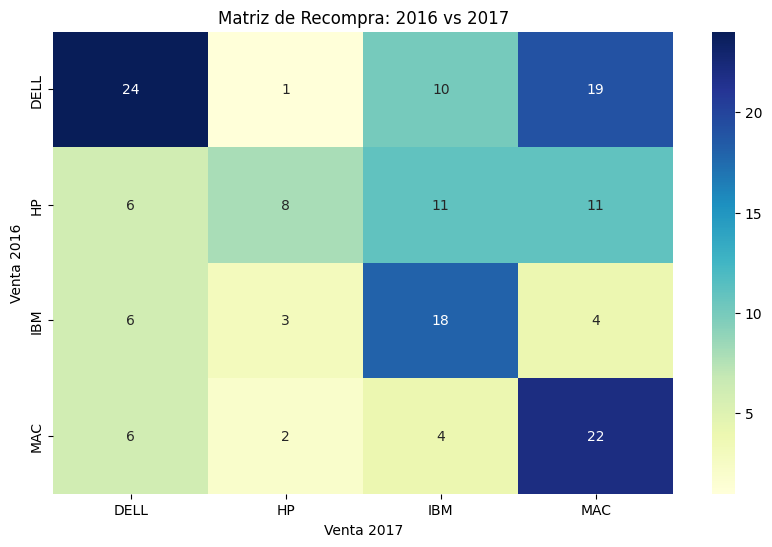

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(recompra_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Matriz de Recompra: 2016 vs 2017')
plt.xlabel('Venta 2017')
plt.ylabel('Venta 2016')
plt.show()

Venta2017       DELL         HP        IBM        MAC
Venta2016                                            
DELL       44.444444   1.851852  18.518519  35.185185
HP         16.666667  22.222222  30.555556  30.555556
IBM        19.354839   9.677419  58.064516  12.903226
MAC        17.647059   5.882353  11.764706  64.705882


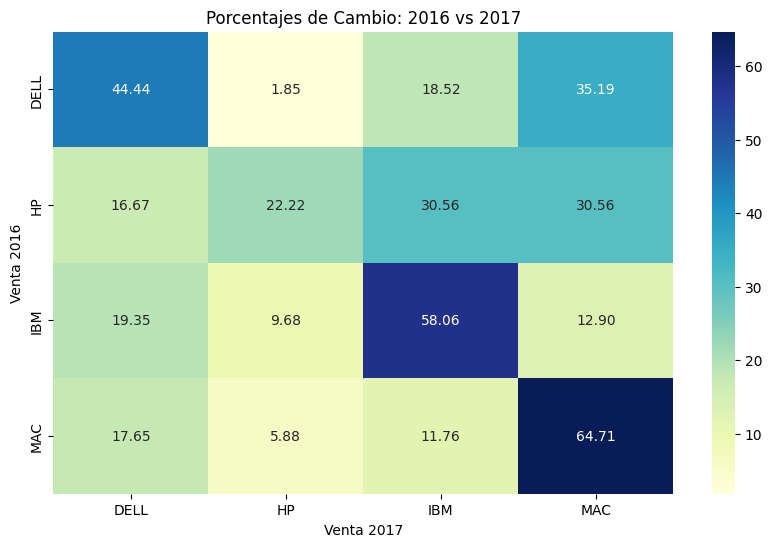

In [41]:
# Calcular los porcentajes de cambio
porcentajes_cambio = recompra_matrix.div(recompra_matrix.sum(axis=1), axis=0) * 100

print(porcentajes_cambio)

# Visualizar los porcentajes de cambio
plt.figure(figsize=(10, 6))
sns.heatmap(porcentajes_cambio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Porcentajes de Cambio: 2016 vs 2017')
plt.xlabel('Venta 2017')
plt.ylabel('Venta 2016')
plt.show()


### Conclusiones

1. **Fidelidad de los clientes**: La matriz de recompra muestra que 24 clientes que compraron equipos DELL en 2016, repitieron la compra de DELL en 2017. Esto representa el mayor número de clientes fieles a una marca.

2. **Cambios de marca**:
    - DELL tiene una fidelidad del 44.44%, pero un 35.19% de sus clientes de 2016 cambiaron a MAC en 2017, lo que indica que MAC es un fuerte competidor.
    - HP tiene una fidelidad del 22.22%, y sus clientes se distribuyen bastante uniformemente entre las otras marcas.
    - IBM retuvo al 58.06% de sus clientes, mostrando la mayor fidelidad entre las marcas.
    - MAC también mostró una alta fidelidad con un 64.71% de sus clientes de 2016 repitiendo la compra en 2017.

3. **Estrategias de marketing**: 
    - DELL debería investigar por qué una gran parte de sus clientes cambiaron a MAC y ajustar sus estrategias para retener más clientes.
    - HP tiene la oportunidad de aumentar su fidelidad, dado que sus clientes están bastante dispersos entre las otras marcas.
    - IBM y MAC pueden centrarse en mantener su alta tasa de fidelidad mientras atraen a nuevos clientes de otras marcas.

Estos análisis son fundamentales para comprender mejor la dinámica de la fidelidad de los clientes y las preferencias de marca, ayudando a las empresas a tomar decisiones estratégicas basadas en datos.

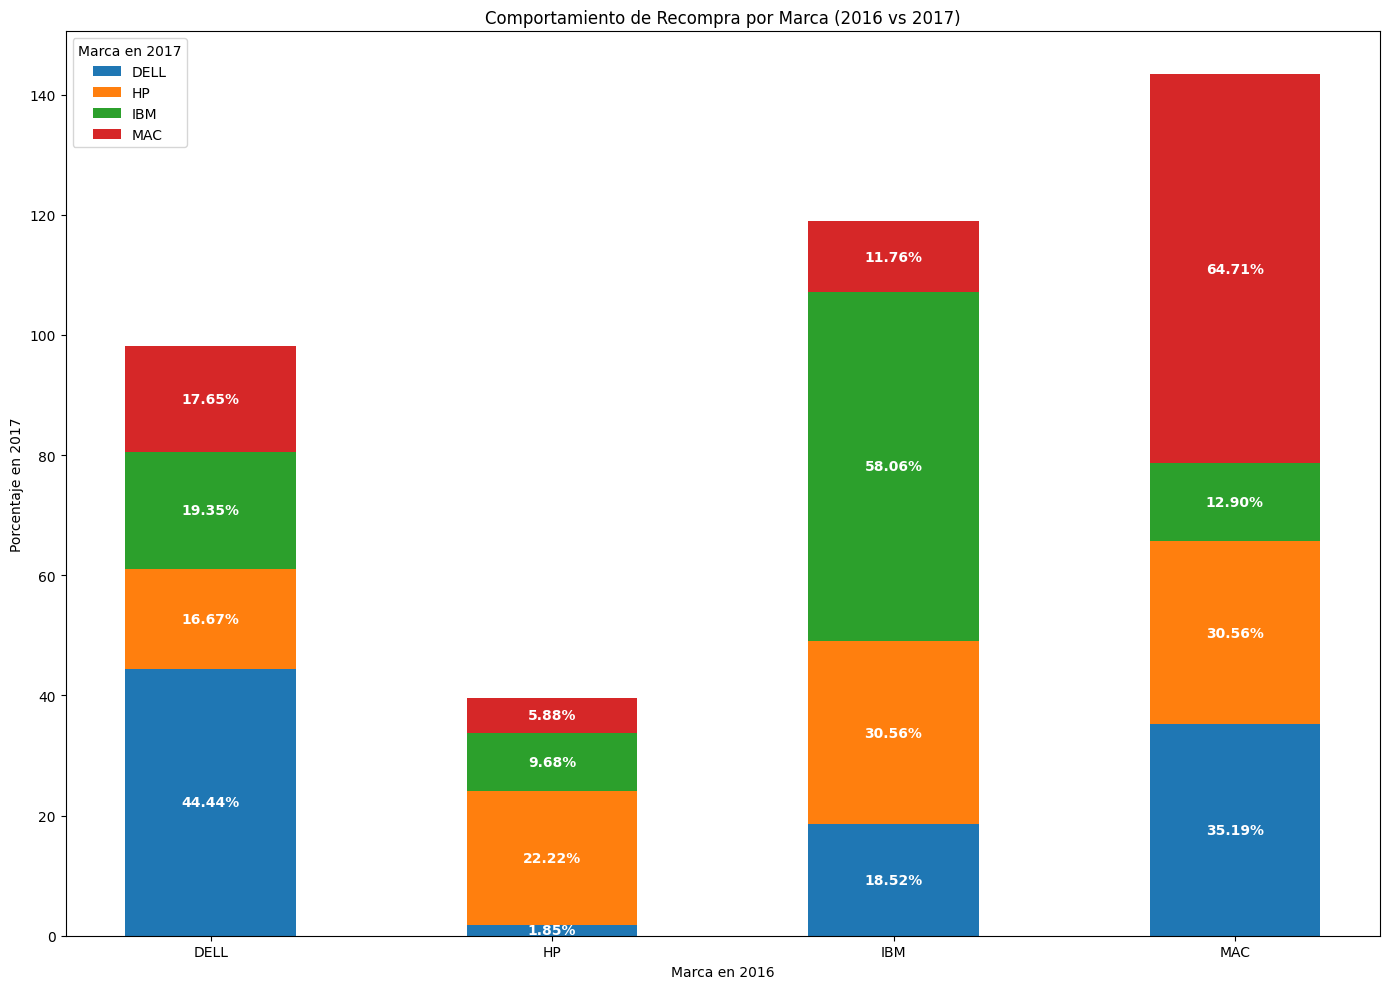

In [46]:
# Crear la visualización de barras apiladas con porcentajes
fig, ax = plt.subplots(figsize=(14, 10))

# Crear las barras apiladas
bar_width = 0.5
indices = np.arange(len(porcentajes_cambio.columns))

bottom = pd.Series(np.zeros(len(porcentajes_cambio.columns)), index=porcentajes_cambio.columns)

for idx, row in porcentajes_cambio.iterrows():
    ax.bar(indices, row, bar_width, bottom=bottom, label=idx)
    bottom += row

# Añadir etiquetas de porcentaje a cada barra
for i in range(len(indices)):
    cumulative_sum = 0
    for j in range(len(porcentajes_cambio.index)):
        porcentaje = porcentajes_cambio.iloc[j, i]
        if porcentaje != 0:
            cumulative_sum += porcentaje
            ax.annotate(f'{porcentaje:.2f}%', 
                        xy=(indices[i], cumulative_sum - (porcentaje / 2)), 
                        xytext=(0, 0), 
                        textcoords='offset points', 
                        ha='center', va='center', color='white', fontweight='bold')

# Configuración del gráfico
ax.set_xlabel('Marca en 2016')
ax.set_ylabel('Porcentaje en 2017')
ax.set_title('Comportamiento de Recompra por Marca (2016 vs 2017)')
ax.set_xticks(indices)
ax.set_xticklabels(porcentajes_cambio.columns)
ax.legend(title='Marca en 2017')

plt.tight_layout()
plt.show()

In [47]:
data.columns

Index(['Cliente Nombre', 'ID Cliente', 'Venta2016', 'Venta2017', 'Zona',
       'Number of Records'],
      dtype='object')

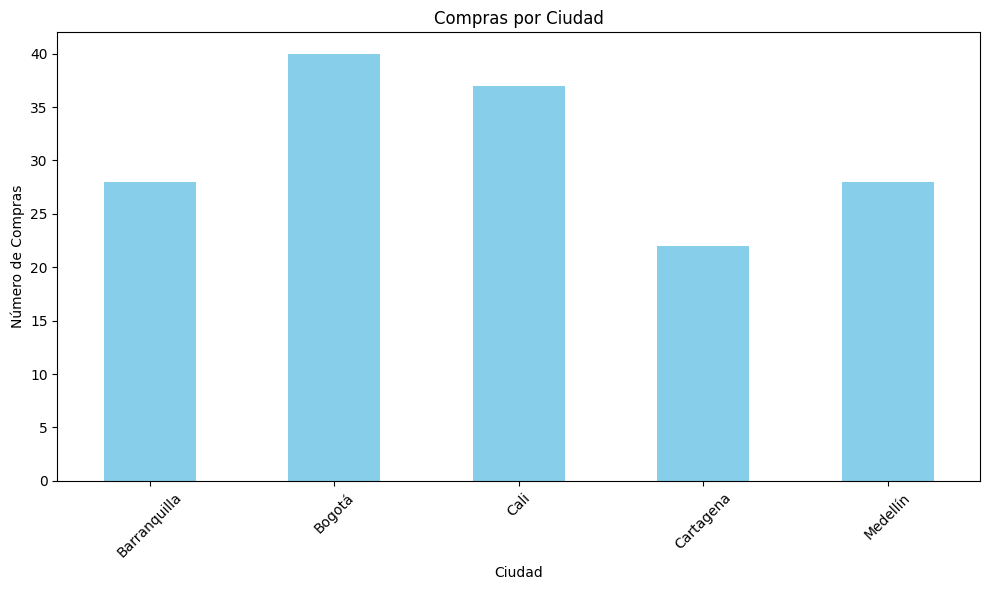

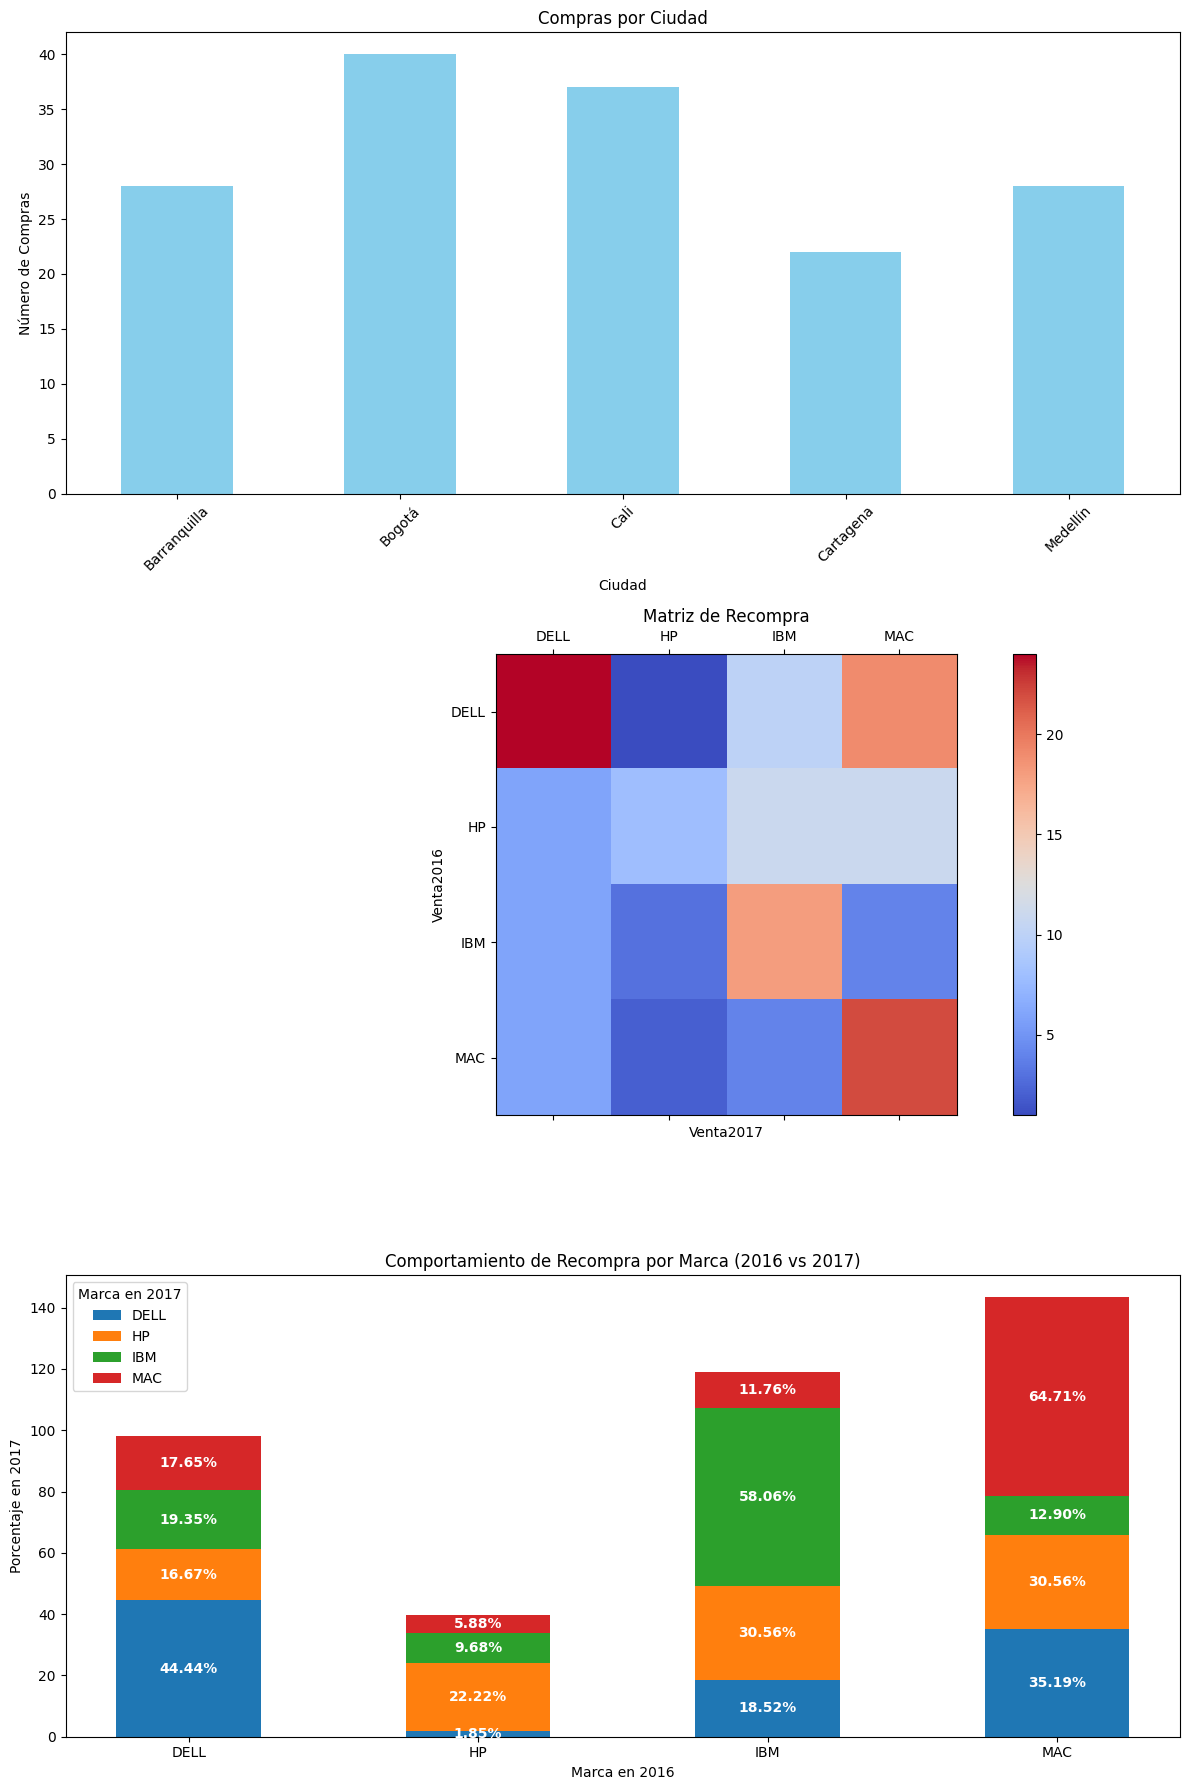

In [50]:
# Agrupar y contar registros por ciudad
compras_ciudad = data.groupby('Zona')['Number of Records'].sum()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
compras_ciudad.plot(kind='bar', ax=ax, color='skyblue')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Número de Compras')
ax.set_title('Compras por Ciudad')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Compras por Ciudad
compras_ciudad.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Ciudad')
axes[0].set_ylabel('Número de Compras')
axes[0].set_title('Compras por Ciudad')
axes[0].tick_params(axis='x', rotation=45)

# Matriz de Recompra (mostramos recompra_matrix)
cax = axes[1].matshow(recompra_matrix, cmap='coolwarm')
fig.colorbar(cax, ax=axes[1])
axes[1].set_xticks(np.arange(len(recompra_matrix.columns)))
axes[1].set_yticks(np.arange(len(recompra_matrix.index)))
axes[1].set_xticklabels(recompra_matrix.columns)
axes[1].set_yticklabels(recompra_matrix.index)
axes[1].set_xlabel('Venta2017')
axes[1].set_ylabel('Venta2016')
axes[1].set_title('Matriz de Recompra')

# Comportamiento de Recompra (porcentajes_cambio)
bottom = pd.Series([0, 0, 0, 0], index=porcentajes_cambio.columns)
for idx, row in porcentajes_cambio.iterrows():
    axes[2].bar(indices, row, bar_width, bottom=bottom, label=idx)
    bottom += row

for i in range(len(indices)):
    cumulative_sum = 0
    for j in range(len(porcentajes_cambio.index)):
        porcentaje = porcentajes_cambio.iloc[j, i]
        if porcentaje != 0:
            cumulative_sum += porcentaje
            axes[2].annotate(f'{porcentaje:.2f}%', 
                            xy=(indices[i], cumulative_sum - (porcentaje / 2)), 
                            xytext=(0, 0), 
                            textcoords='offset points', 
                            ha='center', va='center', color='white', fontweight='bold')

axes[2].set_xlabel('Marca en 2016')
axes[2].set_ylabel('Porcentaje en 2017')
axes[2].set_title('Comportamiento de Recompra por Marca (2016 vs 2017)')
axes[2].set_xticks(indices)
axes[2].set_xticklabels(porcentajes_cambio.columns)
axes[2].legend(title='Marca en 2017')

plt.tight_layout()
plt.show()

In [51]:
compras_ciudad

Zona
Barranquilla    28
Bogotá          40
Cali            37
Cartagena       22
Medellín        28
Name: Number of Records, dtype: int64

# Toda la info

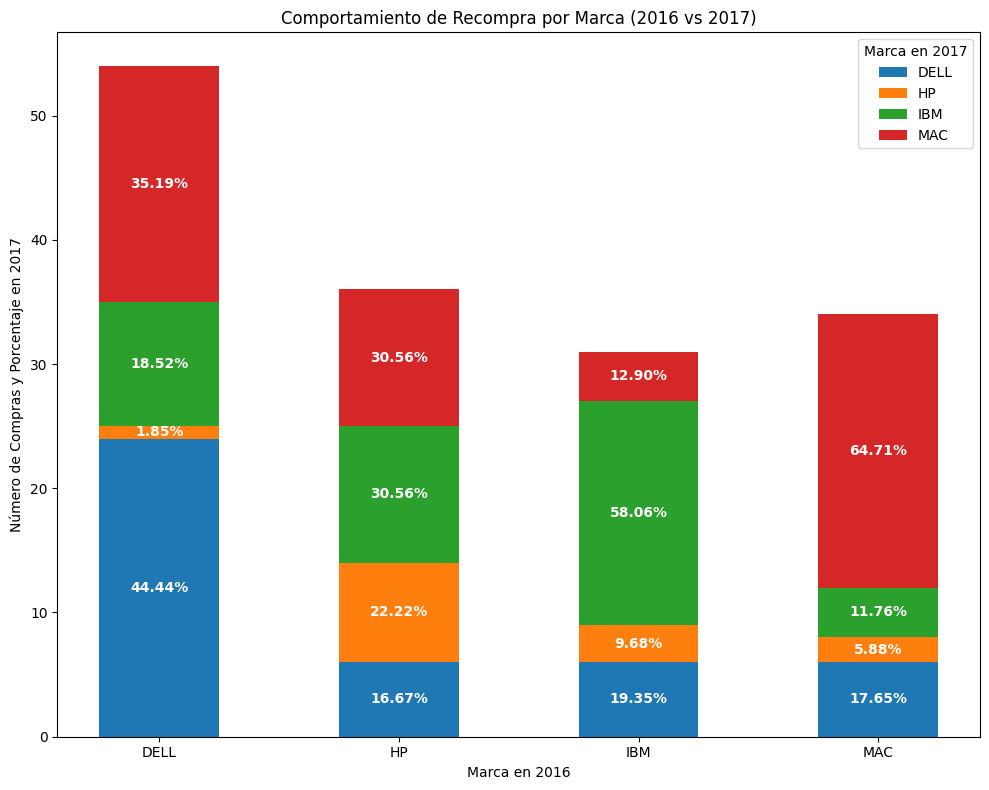

In [64]:
df = pd.DataFrame(data)

# Crear la matriz de recompra
recompra_matrix = pd.crosstab(df['Venta2016'], df['Venta2017'])

# Calcular los porcentajes de cambio
porcentajes_cambio = recompra_matrix.div(recompra_matrix.sum(axis=1), axis=0) * 100

# Crear un DataFrame consolidado
consolidado_df = recompra_matrix.copy()
for col in recompra_matrix.columns:
    consolidado_df[col + '_%'] = porcentajes_cambio[col]

# Visualización del DataFrame Consolidado
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el gráfico de barras apiladas con porcentajes
bar_width = 0.5
indices = np.arange(len(consolidado_df.index))
bottom = pd.Series([0] * len(consolidado_df.index), index=consolidado_df.index)

# Agregar barras para cada marca
for col in recompra_matrix.columns:
    ax.bar(indices, consolidado_df[col], bar_width, bottom=bottom, label=col)
    bottom += consolidado_df[col]

# Añadir etiquetas de porcentaje a cada barra
for i in range(len(indices)):
    cumulative_sum = 0
    for j in range(len(recompra_matrix.columns)):
        porcentaje = consolidado_df.iloc[i, len(recompra_matrix.columns) + j]
        if porcentaje != 0:
            cumulative_sum += consolidado_df.iloc[i, j]
            ax.annotate(f'{porcentaje:.2f}%', 
                        xy=(indices[i], cumulative_sum - (consolidado_df.iloc[i, j] / 2)), 
                        xytext=(0, 0), 
                        textcoords='offset points', 
                        ha='center', va='center', color='white', fontweight='bold')

# Configuración del gráfico
ax.set_xlabel('Marca en 2016')
ax.set_ylabel('Número de Compras y Porcentaje en 2017')
ax.set_title('Comportamiento de Recompra por Marca (2016 vs 2017)')
ax.set_xticks(indices)
ax.set_xticklabels(consolidado_df.index)
ax.legend(title='Marca en 2017')

plt.tight_layout()
plt.show()

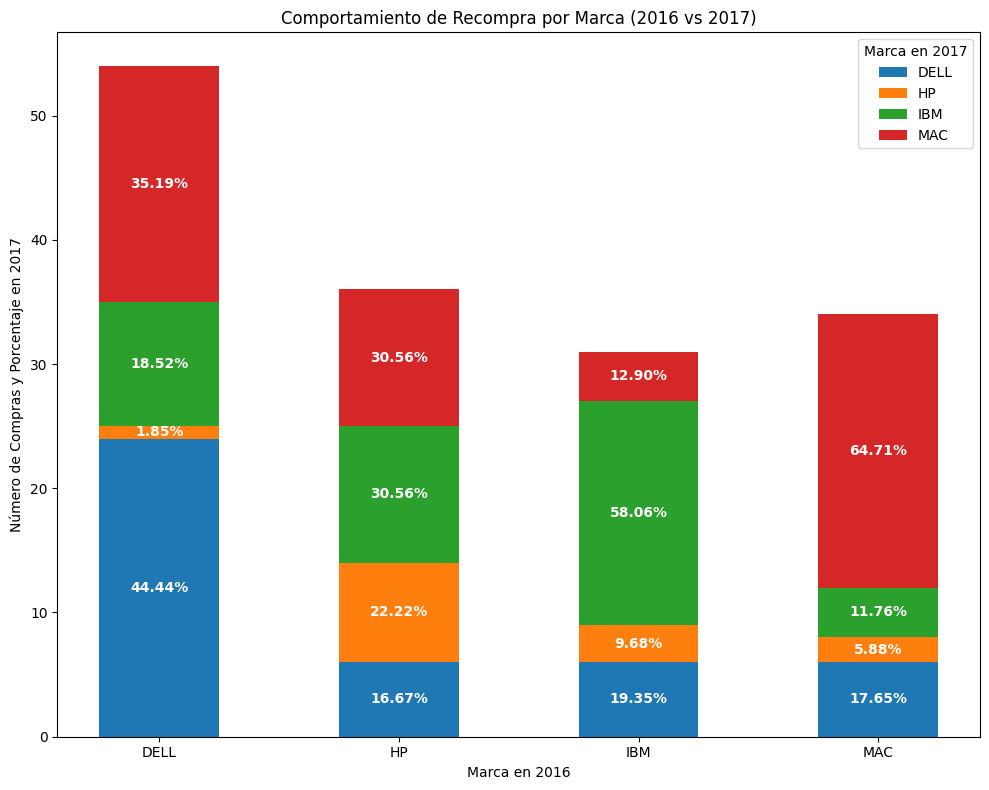

In [65]:
df = pd.DataFrame(data)

# Crear la matriz de recompra
recompra_matrix = pd.crosstab(df['Venta2016'], df['Venta2017'])

# Calcular los porcentajes de cambio
porcentajes_cambio = recompra_matrix.div(recompra_matrix.sum(axis=1), axis=0) * 100

# Crear un DataFrame consolidado
consolidado_df = recompra_matrix.copy()
for col in recompra_matrix.columns:
    consolidado_df[col + '_%'] = porcentajes_cambio[col]

# Visualización del DataFrame Consolidado
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el gráfico de barras apiladas con porcentajes
bar_width = 0.5
indices = np.arange(len(consolidado_df.index))
bottom = pd.Series([0] * len(consolidado_df.index), index=consolidado_df.index)

# Agregar barras para cada marca
for col in recompra_matrix.columns:
    ax.bar(indices, consolidado_df[col], bar_width, bottom=bottom, label=col)
    bottom += consolidado_df[col]

# Añadir etiquetas de porcentaje a cada barra
for i in range(len(indices)):
    cumulative_sum = 0
    for j in range(len(recompra_matrix.columns)):
        porcentaje = consolidado_df.iloc[i, len(recompra_matrix.columns) + j]
        if porcentaje != 0:
            cumulative_sum += consolidado_df.iloc[i, j]
            ax.annotate(f'{porcentaje:.2f}%', 
                        xy=(indices[i], cumulative_sum - (consolidado_df.iloc[i, j] / 2)), 
                        xytext=(0, 0), 
                        textcoords='offset points', 
                        ha='center', va='center', color='white', fontweight='bold')

# Configuración del gráfico
ax.set_xlabel('Marca en 2016')
ax.set_ylabel('Número de Compras y Porcentaje en 2017')
ax.set_title('Comportamiento de Recompra por Marca (2016 vs 2017)')
ax.set_xticks(indices)
ax.set_xticklabels(consolidado_df.index)
ax.legend(title='Marca en 2017')

plt.tight_layout()
plt.show()

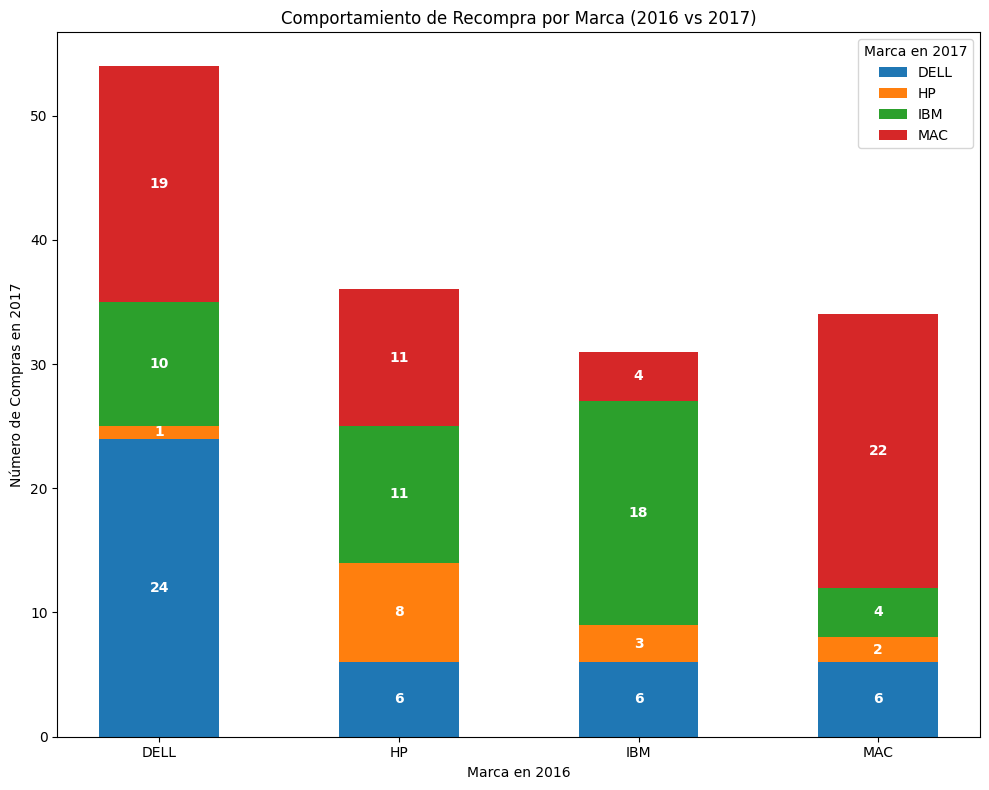

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el gráfico de barras apiladas
bar_width = 0.5
indices = np.arange(len(consolidado_df.index))
bottom = pd.Series([0] * len(consolidado_df.index), index=consolidado_df.index)

# Agregar barras para cada marca
for col in recompra_matrix.columns:
    ax.bar(indices, consolidado_df[col], bar_width, bottom=bottom, label=col)
    bottom += consolidado_df[col]

# Añadir etiquetas de valor a cada barra
for i in range(len(indices)):
    cumulative_sum = 0
    for j in range(len(recompra_matrix.columns)):
        valor = consolidado_df.iloc[i, j]
        if valor != 0:
            cumulative_sum += valor
            ax.annotate(f'{valor}', 
                        xy=(indices[i], cumulative_sum - (valor / 2)), 
                        xytext=(0, 0), 
                        textcoords='offset points', 
                        ha='center', va='center', color='white', fontweight='bold')

# Configuración del gráfico
ax.set_xlabel('Marca en 2016')
ax.set_ylabel('Número de Compras en 2017')
ax.set_title('Comportamiento de Recompra por Marca (2016 vs 2017)')
ax.set_xticks(indices)
ax.set_xticklabels(consolidado_df.index)
ax.legend(title='Marca en 2017')

plt.tight_layout()
plt.show()

In [61]:
data.groupby('Venta2016')['Number of Records'].sum()

Venta2016
DELL    54
HP      36
IBM     31
MAC     34
Name: Number of Records, dtype: int64

In [62]:
data.groupby('Venta2017')['Number of Records'].sum()

Venta2017
DELL    42
HP      14
IBM     43
MAC     56
Name: Number of Records, dtype: int64

In [56]:
# Crear la matriz de recompra
recompra_matrix = pd.crosstab(df['Venta2016'], df['Venta2017'])
print(recompra_matrix)

Venta2017  DELL  HP  IBM  MAC
Venta2016                    
DELL         24   1   10   19
HP            6   8   11   11
IBM           6   3   18    4
MAC           6   2    4   22


In [57]:
# Calcular los porcentajes de cambio
porcentajes_cambio = recompra_matrix.div(recompra_matrix.sum(axis=1), axis=0) * 100
print(porcentajes_cambio)

Venta2017       DELL         HP        IBM        MAC
Venta2016                                            
DELL       44.444444   1.851852  18.518519  35.185185
HP         16.666667  22.222222  30.555556  30.555556
IBM        19.354839   9.677419  58.064516  12.903226
MAC        17.647059   5.882353  11.764706  64.705882


In [58]:
# Crear un DataFrame consolidado
consolidado_df = recompra_matrix.copy()
for col in recompra_matrix.columns:
    consolidado_df[col + '_%'] = porcentajes_cambio[col]

print(consolidado_df)

Venta2017  DELL  HP  IBM  MAC     DELL_%       HP_%      IBM_%      MAC_%
Venta2016                                                                
DELL         24   1   10   19  44.444444   1.851852  18.518519  35.185185
HP            6   8   11   11  16.666667  22.222222  30.555556  30.555556
IBM           6   3   18    4  19.354839   9.677419  58.064516  12.903226
MAC           6   2    4   22  17.647059   5.882353  11.764706  64.705882


In [59]:
compras_ciudad

Zona
Barranquilla    28
Bogotá          40
Cali            37
Cartagena       22
Medellín        28
Name: Number of Records, dtype: int64

In [60]:
consolidado_df

Venta2017,DELL,HP,IBM,MAC,DELL_%,HP_%,IBM_%,MAC_%
Venta2016,,,,,,,,
DELL,24,1,10,19,44.444444,1.851852,18.518519,35.185185
HP,6,8,11,11,16.666667,22.222222,30.555556,30.555556
IBM,6,3,18,4,19.354839,9.677419,58.064516,12.903226
MAC,6,2,4,22,17.647059,5.882353,11.764706,64.705882


/var/folders/sm/vkxvnt3d3230grm_m_d823c80000gn/T/ipykernel_10105/2570444868.py:42: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


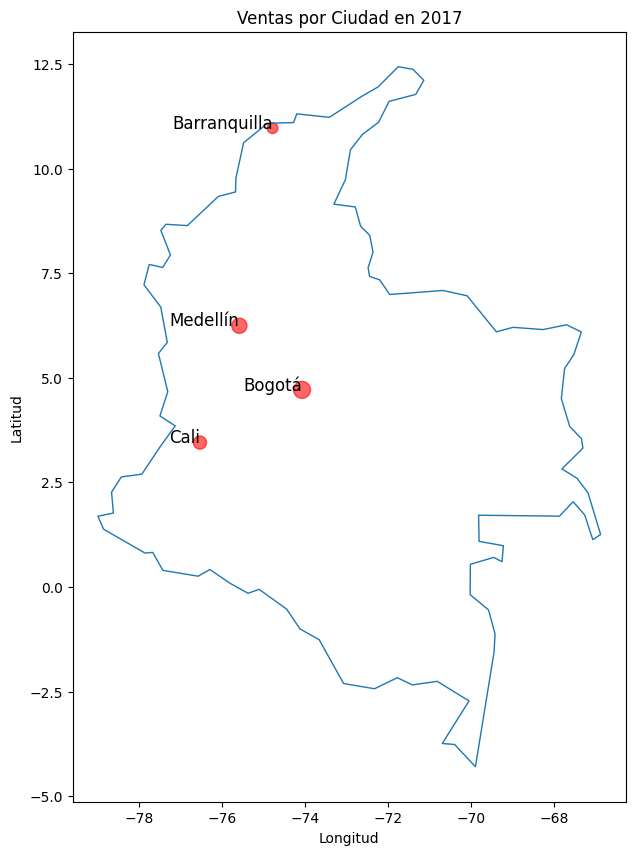

In [68]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Ventas por ciudad en 2017
ventas_por_ciudad = {
    "Bogotá": 150,
    "Medellín": 120,
    "Cali": 90,
    "Barranquilla": 60
}

# Coordenadas aproximadas de las ciudades
coordenadas_ciudades = {
    "Bogotá": (4.7110, -74.0721),
    "Medellín": (6.2442, -75.5812),
    "Cali": (3.4516, -76.5320),
    "Barranquilla": (10.9685, -74.7813)
}

# Crear un DataFrame con los datos de las ciudades
data = {
    "Ciudad": [],
    "Ventas": [],
    "Lat": [],
    "Lon": []
}

for ciudad, ventas in ventas_por_ciudad.items():
    lat, lon = coordenadas_ciudades[ciudad]
    data["Ciudad"].append(ciudad)
    data["Ventas"].append(ventas)
    data["Lat"].append(lat)
    data["Lon"].append(lon)

df = pd.DataFrame(data)

# Convertir DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat), crs="EPSG:4326")

# Leer el shapefile de Colombia para el mapa base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
colombia = world[(world.name == "Colombia")]

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colombia.boundary.plot(ax=ax, linewidth=1)

# Agregar los puntos de las ciudades
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Ventas'], alpha=0.6)

# Agregar etiquetas
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Ciudad"]):
    ax.text(x, y, label, fontsize=12, ha='right')

plt.title("Ventas por Ciudad en 2017")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


In [69]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Ventas por ciudad en 2017
ventas_por_ciudad = {
    "Bogotá": 150,
    "Medellín": 120,
    "Cali": 90,
    "Barranquilla": 60
}

# Coordenadas aproximadas de las ciudades
coordenadas_ciudades = {
    "Bogotá": (4.7110, -74.0721),
    "Medellín": (6.2442, -75.5812),
    "Cali": (3.4516, -76.5320),
    "Barranquilla": (10.9685, -74.7813)
}

# Crear un DataFrame con los datos de las ciudades
data = {
    "Ciudad": [],
    "Ventas": [],
    "Lat": [],
    "Lon": []
}

for ciudad, ventas in ventas_por_ciudad.items():
    lat, lon = coordenadas_ciudades[ciudad]
    data["Ciudad"].append(ciudad)
    data["Ventas"].append(ventas)
    data["Lat"].append(lat)
    data["Lon"].append(lon)

df = pd.DataFrame(data)

# Convertir DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat), crs="EPSG:4326")

# Leer el shapefile de Colombia para el mapa base
shapefile_path = 'path_to_extracted_shapefile/ne_110m_admin_0_countries.shp'  # Update this path with the correct path to the extracted shapefile
world = gpd.read_file(shapefile_path)
colombia = world[(world.name == "Colombia")]

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colombia.boundary.plot(ax=ax, linewidth=1)

# Agregar los puntos de las ciudades
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Ventas'], alpha=0.6)

# Agregar etiquetas
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Ciudad"]):
    ax.text(x, y, label, fontsize=12, ha='right')

plt.title("Ventas por Ciudad en 2017")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


DriverError: path_to_extracted_shapefile/ne_110m_admin_0_countries.shp: No such file or directory

In [ ]:
-_-----__